# Importing libraries 

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# Creating an instance for dataset 

In [2]:
mnist = input_data.read_data_sets("/tmp/data", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

# Creating nodes for each layer

In [3]:
n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500

In [4]:
n_classes = 10
batch_size = 100

# Declaring Place Holder 

In [5]:
x = tf.placeholder('float',[None, 784])
y = tf.placeholder('float')

# Defining our Neural_network 

## ~ Weights are just like slopes in the line equation y = mx + c . Here, 'm' is the weights, 'c' is the bias and 'x' is our input

## ~ Biases are added, so that even our input are zero it will be added and makes it a valuable node in the graph

In [34]:
def neural_network_model(data):
    
    # Creating hidden layers
    
    hidden_layer_1 = {'weights': tf.Variable(tf.random_normal([784, n_nodes_hl1])), 'biases': tf.Variable(tf.random_normal([n_nodes_hl1]))}
    
    hidden_layer_2 = {'weights': tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])), 'biases': tf.Variable(tf.random_normal([n_nodes_hl2]))}
    
    hidden_layer_3 = {'weights': tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])), 'biases': tf.Variable(tf.random_normal([n_nodes_hl3]))}
    
    output_layer = {'weights': tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])), 'biases': tf.Variable(tf.random_normal([n_classes]))}
    
    # Implementing out Neural Network 
    
    # form = (input_data * weights) + biases  (y = mx + c)
    
    l1 = tf.add(tf.matmul(data, hidden_layer_1['weights']) , hidden_layer_1['biases'])
    l1 = tf.nn.relu(l1)
    
    l2 = tf.add(tf.matmul(l1, hidden_layer_2['weights']), hidden_layer_2['biases'])
    l2 = tf.nn.relu(l2)
    
    l3 = tf.add(tf.matmul(l2, hidden_layer_3['weights']), hidden_layer_3['biases'])
    l3 = tf.nn.relu(l3)
    
    output = tf.add(tf.matmul(l3, output_layer['weights']), output_layer['biases'])
    
    return output 
    
    

# Training the Neural Network 

### ~ Softmax : 
     Simplify the values in a tensor, so that the sum of the values of tensor after applying softmax is 1.
### ~ Cross entropy :
                      (A : 0, B : 1, C : 0) - actual results
                      (A : 0.228, B : 0.619, C : 0.153) - predicted results
                      Now the cross entropy formula is 
### 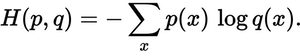
        Where p(x) is the wanted probability, and q(x) the actual probability. 
        The sum is over the three classes A, B, and C. In this case the loss is 0.479
        
        H = - (0.0*ln(0.228) + 1.0*ln(0.619) + 0.0*ln(0.153)) = 0.479
### ~ tf.nn.softmax_cross_entropy_with_logits :
    It calculates the cross entropy for softmax activated tensor.
### ~ Loss function : 
    It is the calculation of how accurate our prediction is. Higher the loss function value, lower the accuracy.
### ~ tf.reduce_mean : 
    It calculates the mean of the variables in the tensor
### ~ Optimizer : 
    It Shapes and mold your model into its most accurate possible form by futzing with the weights. 
    The loss function is the guide to the terrain, telling the optimizer when it’s moving in the right or wrong direction
    
### ~ tf.equal (x, y):
    It equals the tensor x and tensor y and return 0 or 1.
    
### ~ tf.argmax (x, y):
    It returns the position of the highest value in a tensor.
    
### ~ tf.reduce_mean:
    It calculates the mean of the values in a tensor.
    
### ~ tf.cast:
    It change the type of the tensor value.
    
### ~ x.eval (y_ dict):
    It evaluates the y_dict using the x tensor. 

In [37]:
def train_neural_network(x):
    
    prediction = neural_network_model(x)
    
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits = prediction,labels = y))
    
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    hm_epochs = 10
    
    with tf.Session() as sess:
        
        sess.run(tf.initialize_all_variables())
        
        for epoch in range (hm_epochs):
            epoch_loss = 0
            
            for _ in range(int(mnist.train.num_examples/batch_size)):
                
                epoch_x,epoch_y = mnist.train.next_batch(batch_size)
                _, c = sess.run([optimizer, cost], feed_dict = {x: epoch_x, y: epoch_y})
                epoch_loss += c
                
            print ('Epoch', epoch, 'completed out of', hm_epochs, 'loss:', epoch_loss)
        
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        
        print ('Accuracy:', accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))


In [38]:
 train_neural_network(x)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch 0 completed out of 10 loss: 1854678.005859375
Epoch 1 completed out of 10 loss: 411258.3485221863
Epoch 2 completed out of 10 loss: 231244.92983055115
Epoch 3 completed out of 10 loss: 139733.31656074524
Epoch 4 completed out of 10 loss: 88242.4004573822
Epoch 5 completed out of 10 loss: 55417.16866210103
Epoch 6 completed out of 10 loss: 37574.53064407187
Epoch 7 completed out of 10 loss: 28541.523574769497
Epoch 8 completed out of 10 loss: 22374.329221760036
Epoch 9 completed out of 10 loss: 19265.0059681198
Accuracy: 0.9494
